In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/Datasete/walmart-recruiting-store-sales-forecasting.zip

Archive:  /content/drive/MyDrive/Datasete/walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
!unzip test.csv.zip
!unzip features.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  features.csv.zip
  inflating: features.csv            


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv("features.csv")

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
train.Date = pd.to_datetime(train.Date)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features.Date = pd.to_datetime(features.Date)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train.Store.value_counts()[:10]

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
Name: Store, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

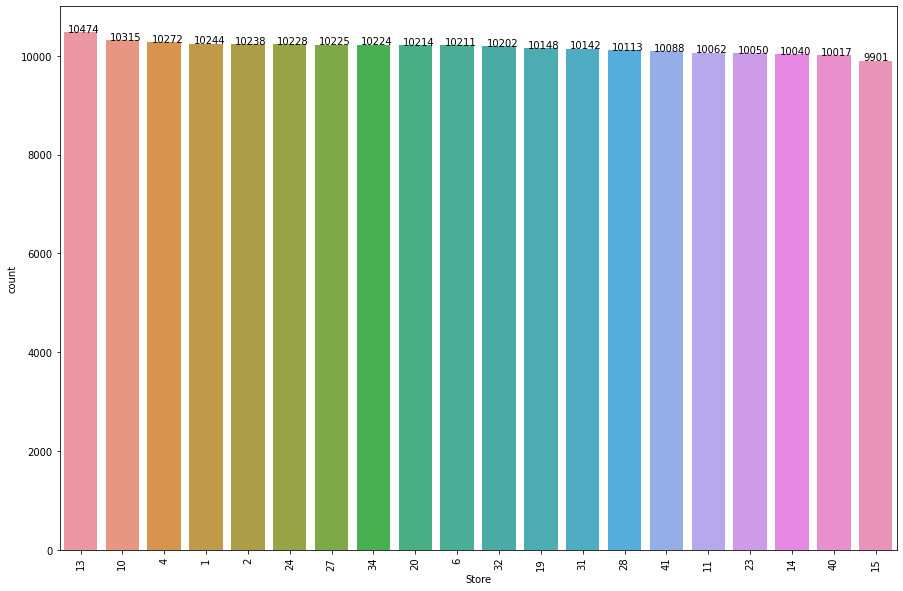

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x = 'Store', data = train, order = train.Store.value_counts().index[:20])
for p in ax.patches:
  ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.xticks(rotation = 90)

In [ ]:
df_Sales = train.groupby(train['Store'])["Weekly_Sales"].sum()
df_Sales = df_Sales.reset_index()

In [ ]:
top_20 = df_Sales.sort_values("Weekly_Sales", ascending = False)[:20]
top_20

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [ ]:
top_20['Weekly_Sales'] = top_20['Weekly_Sales'] / 10**8
top_20

,Store,Weekly_Sales
19,20,3.013978
3,4,2.995440
13,14,2.889999
12,13,2.865177
1,2,2.753824
9,10,2.716177
26,27,2.538559
5,6,2.237561
0,1,2.224028
38,39,2.074455


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

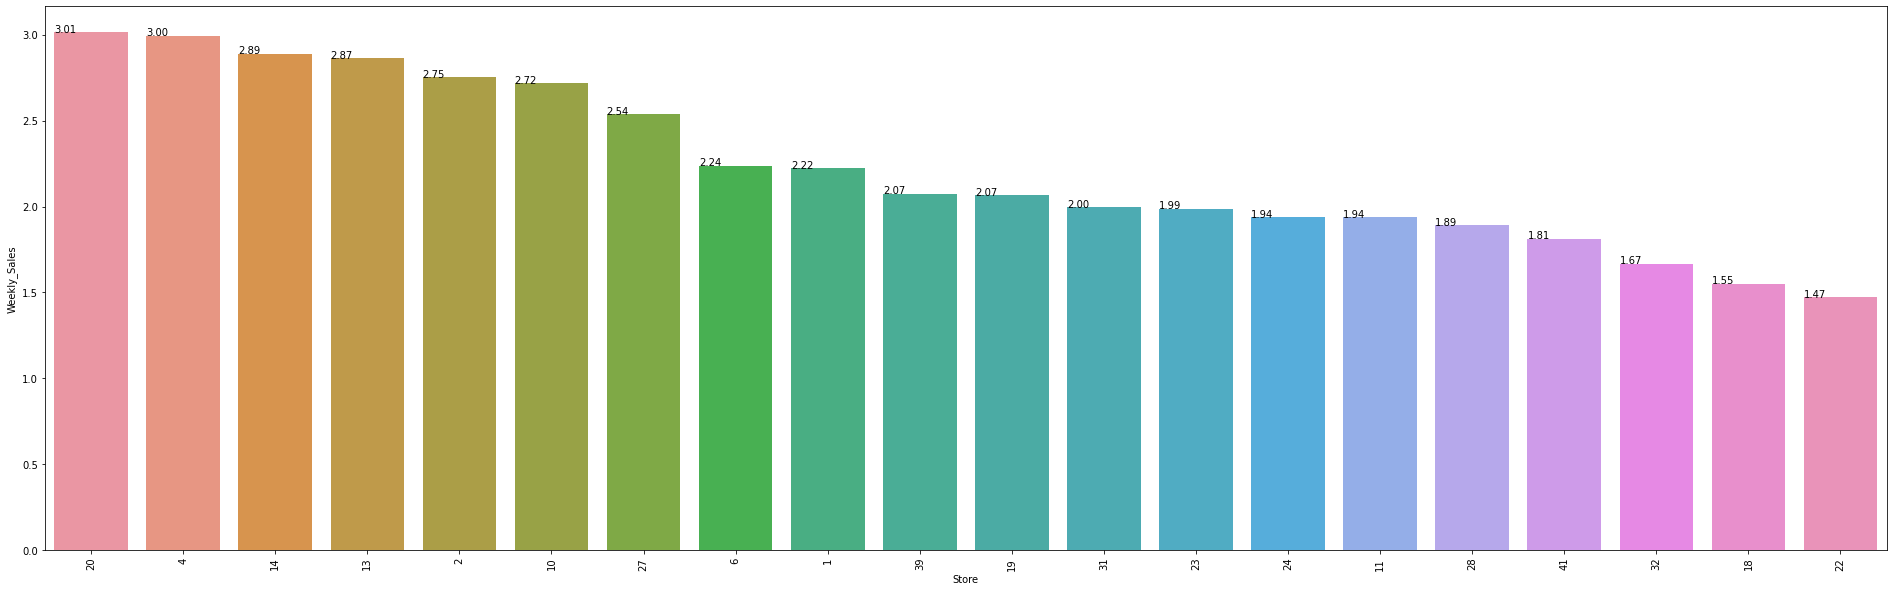

In [ ]:
plt.figure(figsize=(33, 10))
ax = sns.barplot(x = 'Store', y= 'Weekly_Sales', data = top_20, order = top_20.sort_values('Weekly_Sales', ascending= False).Store)
for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.xticks(rotation = 90)

In [ ]:
Stores_feature = features.merge(stores, how = 'inner', on = 'Store')


In [ ]:
Stores_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [ ]:
missing_values = Stores_feature.isna().sum()
import plotly.express as px

In [ ]:
px.bar(missing_values)

In [ ]:
px.pie(Stores_feature, values = Stores_feature.Type.value_counts().values, names = Stores_feature.Type.value_counts().index)

In [ ]:
Store_Size = Stores_feature.groupby('Type')['Size'].mean()


In [ ]:
px.bar(Store_Size,
       title = 'Average Store Size')

In [ ]:
Stores_feature['Week'] = Stores_feature.Date.dt.week
Stores_feature['Year'] = Stores_feature.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
Stores_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,9,2010


In [ ]:
Stores_feature.Year.value_counts()

2011    2340
2012    2340
2010    2160
2013    1350
Name: Year, dtype: int64

In [ ]:
x = Stores_feature.loc[Stores_feature.IsHoliday == True]
x.Week.value_counts()

6     180
36    135
47    135
52    135
Name: Week, dtype: int64

In [ ]:
train['Week'] = train.Date.dt.week
train['Year'] = train.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year
0,1,1,2010-02-05,24924.50,False,5,2010
1,1,1,2010-02-12,46039.49,True,6,2010
2,1,1,2010-02-19,41595.55,False,7,2010
3,1,1,2010-02-26,19403.54,False,8,2010
4,1,1,2010-03-05,21827.90,False,9,2010


In [ ]:
train.Year.value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [ ]:
Sales_2010 = train.loc[train.Year == 2010]
Sales_2011 = train.loc[train.Year == 2011]
Sales_2012 = train.loc[train.Year == 2012]


In [ ]:
Weekly_2010 = Sales_2010['Weekly_Sales'].groupby(Sales_2010['Week']).mean()
Weekly_2011 = Sales_2011['Weekly_Sales'].groupby(Sales_2011['Week']).mean()
Weekly_2012 = Sales_2012['Weekly_Sales'].groupby(Sales_2012['Week']).mean()


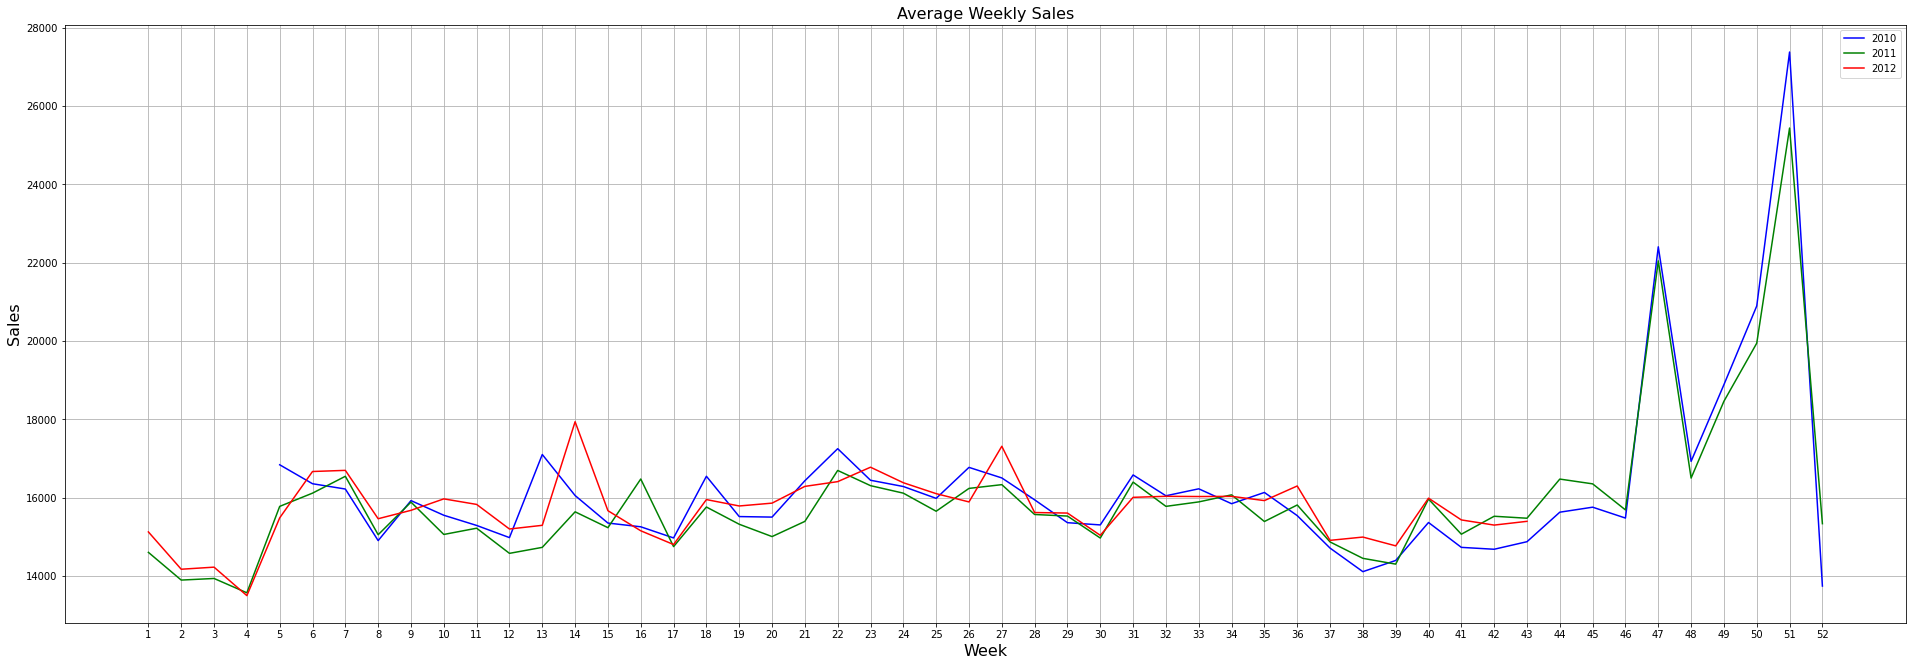

In [ ]:
plt.figure(figsize=(33, 11))
plt.grid()
plt.plot(Weekly_2010.index, Weekly_2010.values, label = '2010', color= 'blue')
plt.plot(Weekly_2011.index, Weekly_2011.values, label = '2011', color= 'green')
plt.plot(Weekly_2012.index, Weekly_2012.values, label = '2012', color= 'red')
plt.xticks(np.arange(1, 53, step = 1))
plt.title("Average Weekly Sales", fontsize = 16)
plt.xlabel('Week', fontsize = 16)
plt.ylabel("Sales", fontsize = 16)
plt.axvline(x = 6, ymin = 14000, ymax = 2000, color = 'k', linestyle='dashed', linewidth = 3)
plt.legend()

In [ ]:
x = train.groupby("Dept")['Weekly_Sales'].mean()
x = x.reset_index()
x = x.sort_values(by = 'Weekly_Sales',ascending = False)
x.head()

,Dept,Weekly_Sales
73,92,75204.870531
76,95,69824.423080
36,38,61090.619568
60,72,50566.515417
57,65,45441.706224


In [ ]:
px.bar(x, x.Dept , x.Weekly_Sales)

In [ ]:
all = train.merge(Stores_feature,
                  how = 'inner',
                  on = ['Store', "Date", 'IsHoliday']).sort_values(by = ['Store',
                                                                         'Dept',
                                                                         'Date']).reset_index(drop = True)


In [ ]:
all = all.drop(['Week_y', 'Year_y'], axis = 1)
all.rename(columns = {"Week_x" : "Week",
                      "Year_x" : 'Year'}, inplace = True)

In [ ]:
all.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,5,2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,6,2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,7,2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,8,2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,9,2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



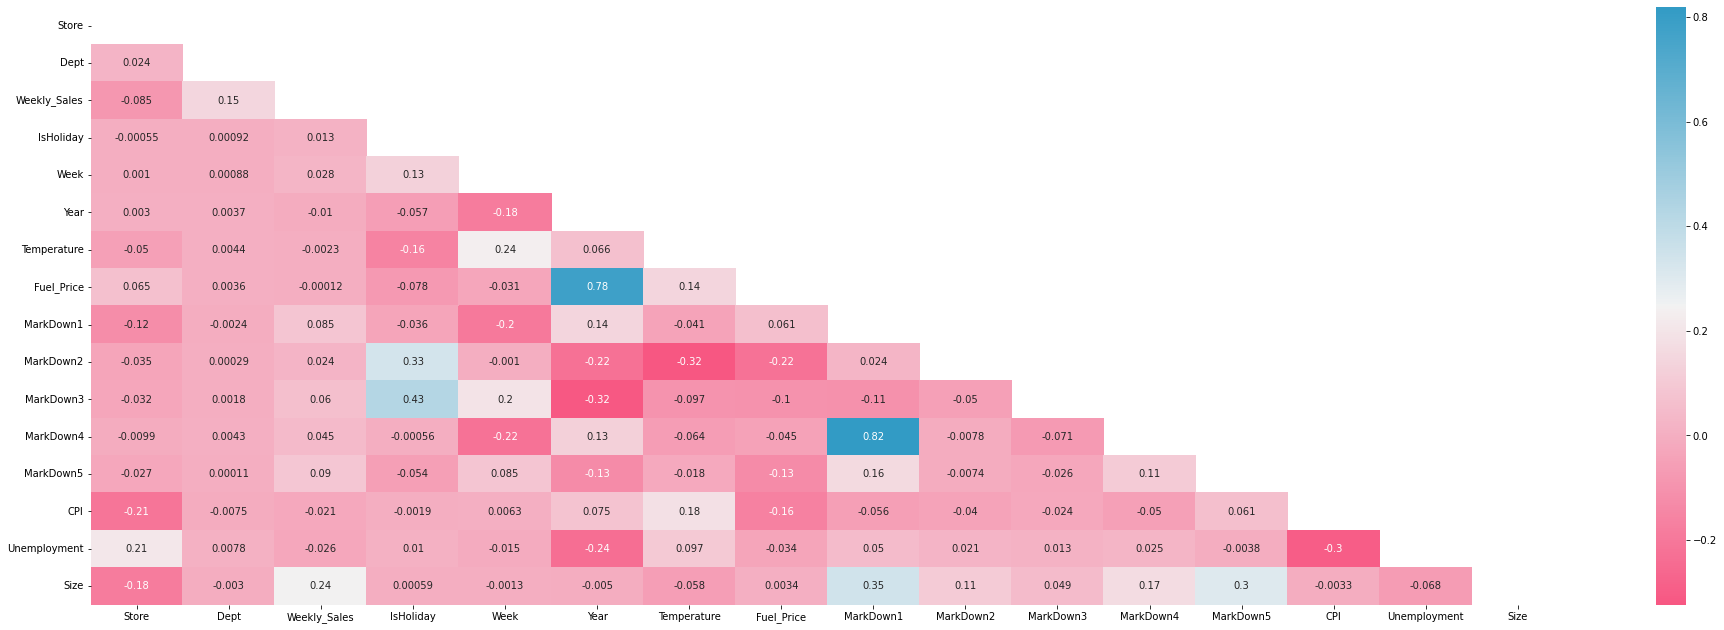

In [ ]:
corr = all.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)
plt.figure(figsize=(33, 11))
sns.heatmap(corr, mask = mask, cmap = cmap, annot = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



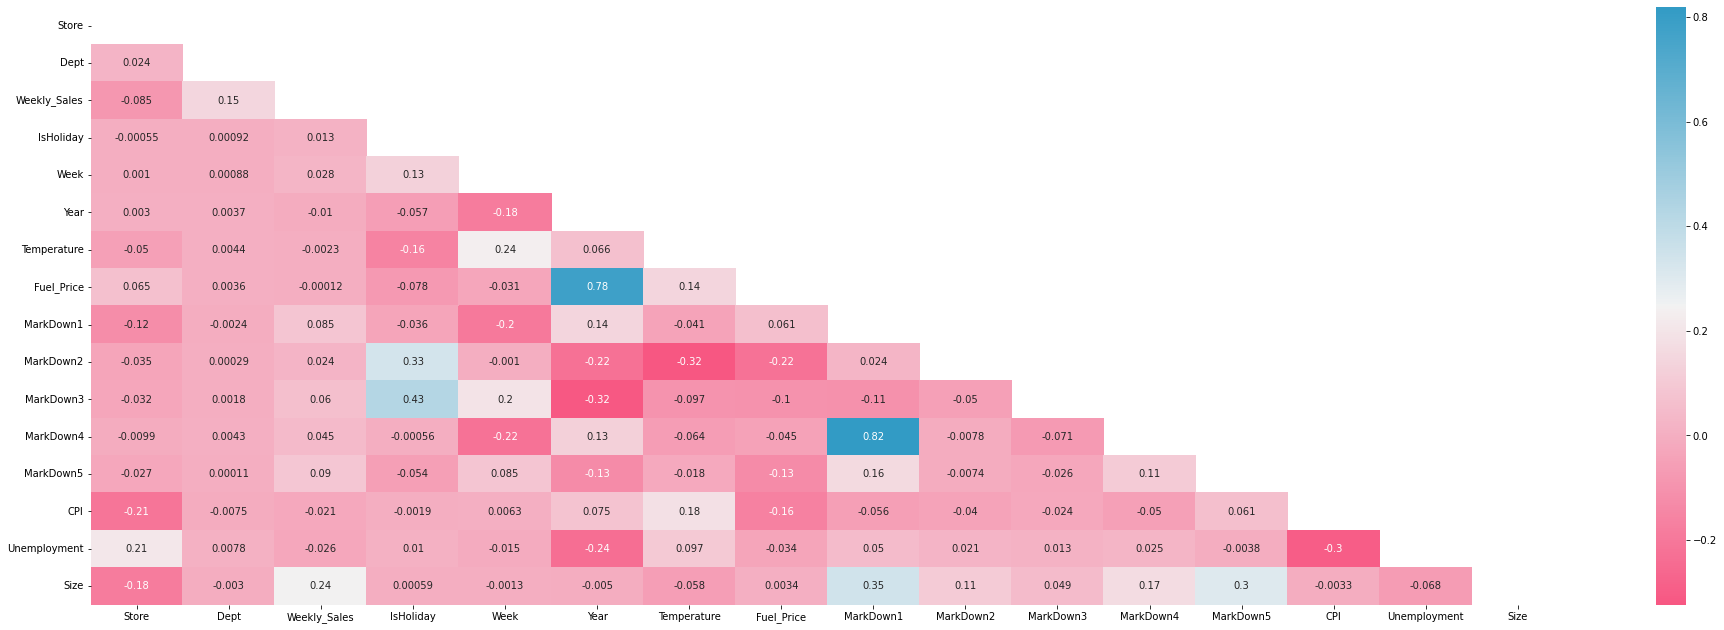

In [ ]:
corr = all.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)
plt.figure(figsize=(33, 11))
sns.heatmap(corr, mask = mask, cmap = cmap, annot = True)

In [ ]:
x = all.groupby('IsHoliday')['Weekly_Sales'].mean().to_frame()

In [ ]:
x

,Weekly_Sales
IsHoliday,
False,15901.445069
True,17035.823187


In [ ]:
px.bar(x)

In [ ]:
x = all.copy()

In [ ]:
x = x.round({'Unemployment' : 0})
x.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,5,2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.0,A,151315
1,1,1,2010-02-12,46039.49,True,6,2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.0,A,151315
2,1,1,2010-02-19,41595.55,False,7,2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.0,A,151315
3,1,1,2010-02-26,19403.54,False,8,2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.0,A,151315
4,1,1,2010-03-05,21827.90,False,9,2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.0,A,151315


In [ ]:
x.Unemployment.value_counts()

8.0     136013
7.0      92867
9.0      67684
6.0      47059
10.0     20753
5.0      16600
14.0     16417
4.0      10052
11.0      6625
12.0      5009
13.0      2491
Name: Unemployment, dtype: int64

In [ ]:
x.loc[x.Unemployment == 8]['Weekly_Sales'].mean(), x.loc[x.Unemployment == 14]['Weekly_Sales'].mean()

(16979.960236006857, 14169.216892245844)

In [ ]:
x.loc[x.Unemployment == 8]['Weekly_Sales'].mean().round(), x.loc[x.Unemployment == 14]['Weekly_Sales'].mean().round()

(16980.0, 14169.0)

In [ ]:
Unemployment8 = x['Weekly_Sales'].groupby(x['Unemployment']).mean().round()
Unemployment14 = x['Weekly_Sales'].groupby(x['Unemployment']).mean().round()


In [ ]:
px.bar(Unemployment8,
       text_auto = '.2s',
       title = 'Average Weekly Sales bassed on Unemployment rate',
       y = 'Weekly_Sales')

In [ ]:
px.line(Unemployment8,
        markers = True)